# Prepare data for analysis

In [1]:
# Load packages 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from ete3 import Tree
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Read in landmark data and phylogeny

In [2]:
treefile = 'data/chazot_full_tree.nw' # read in phylogeny from chazot
wing = 'forewing'
file = f'data/Morpho_{wing}_procCoor.txt' # read in all landmark data from chazot

In [3]:
data =  pd.read_csv(file, sep="\t", index_col=False)
with open(treefile, 'r') as file: 
        newick_tree = file.read()
bphylogeny = Tree(newick_tree)

In [4]:
print(bphylogeny)


      /-eugenia
   /-|
  |   \-marcus
  |
  |         /-anaxibia
  |      /-|
  |     |  |   /-cypris
  |     |   \-|
  |     |      \-rhetenor
  |   /-|
--|  |  |      /-cisseis
  |  |  |   /-|
  |  |  |  |   \-hecuba
  |  |  |  |
  |  |   \-|      /-niepelti
  |  |     |   /-|
  |  |     |  |   \-theseus
  |  |      \-|
  |  |        |   /-hercules
   \-|         \-|
     |           |   /-amphitryon
     |            \-|
     |               \-telemachus
     |
     |   /-polyphemus
     |  |
     |  |         /-granadensis
     |  |      /-|
     |  |     |  |   /-achilles
     |  |     |   \-|
      \-|   /-|      \-helenor
        |  |  |
        |  |  |   /-deidamia
        |  |   \-|
        |  |     |   /-epistrophus
        |  |      \-|
        |  |         \-iphitus
         \-|
           |      /-amathonte
           |   /-|
           |  |  |   /-godartii
           |  |   \-|
           |  |      \-menelaus
           |  |
            \-|      /-zephyritis
            

In [5]:
# make tree for plotting in section 5.4 
#i = 0
#for node in bphylogeny.traverse('levelorder'): 
#    if node.is_leaf(): 
#        pass
#    else: 
#        node.name = str(i)
#    i += 1
    #print(node.name)

#bphylogeny.write(outfile='data/chazot_full_tree_5.3.nw', format=1)

In [6]:
# get all the species names in the right order 
leaves_string = []
for leaf in bphylogeny: 
    leaves_string.append(leaf.name)

# Create downsampled data set

Select landmark data only for male butterflies

In [7]:
leaves_data=[]
landmark_sele =[0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 16, 33, 31, 29, 27, 25, 24]
male_data = data.loc[data['sex']=='M']

In [8]:
 # select only male butterflies
for leaf in leaves_string:
    indices = np.where(male_data.species==leaf)
    cur_specimen = male_data.iloc[indices[0],:]
    cur_leaf = np.mean(np.array(cur_specimen.iloc[:,8::]), axis=0) 
    leaves_data.append(np.array(list(zip(cur_leaf[::2][landmark_sele], cur_leaf[1::2][landmark_sele]))).flatten())

In [9]:
dataframe = pd.DataFrame(np.array(leaves_data).T, columns=leaves_string)
#pd.DataFrame.to_csv(dataframe, 'forewing_data_male.csv', index=False)

## Visualize downsampled male forewings in chazot data

In [10]:
forewing = np.array(pd.read_csv('data/forewing_data_male.csv', delimiter=','))

0
[-0.732626   0.7544295 -0.8169385  0.6375925 -0.7727935  0.3746025
 -0.6870345  0.2053865 -0.604715  -0.0362655 -0.555983  -0.296413
 -0.4918955 -0.541412  -0.2899185 -0.654261  -0.026343  -0.605556
  0.2290765 -0.556826   0.488224  -0.524409   0.747343  -0.5157745
  0.9642765 -0.461214   1.00083   -0.3677565  0.946041  -0.254698
  0.6804995  0.071974   0.3722965  0.3802325  0.025076   0.629385
 -0.368958   0.762236  -0.569707   0.7789155]
1
[-0.8136525  0.7522785 -0.858333   0.6046195 -0.737606   0.3909485
 -0.6511555  0.220789  -0.552986  -0.0273785 -0.5070915 -0.294389
 -0.4717865 -0.5335735 -0.2909895 -0.632325  -0.0280945 -0.595086
  0.2308675 -0.5562545  0.4919595 -0.535364   0.752793  -0.5277525
  0.9745905 -0.4928315  1.03225   -0.4189965  0.9306295 -0.2654105
  0.653785   0.05225    0.3580025  0.3734775  0.0218995  0.640329
 -0.376816   0.7885955 -0.585422   0.8044165]
2
[-0.7706685  0.7110905 -0.8616655  0.617014  -0.7674015  0.3738235
 -0.657704   0.221039  -0.595173  -0.0

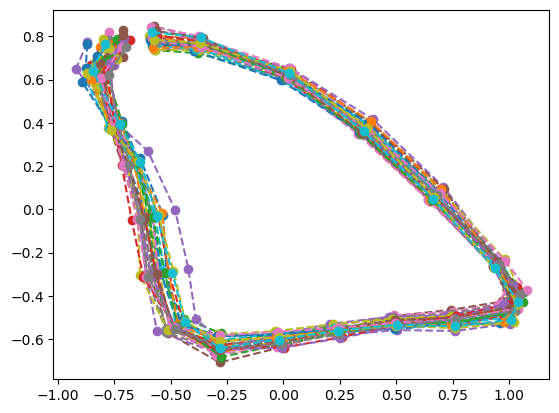

In [16]:
for i in range(forewing.shape[1]):
    print(i)
    wing = forewing[:,i]
    print(wing)
    plt.plot(wing[::2], wing[1::2], '--o')

# Create full male forewing data


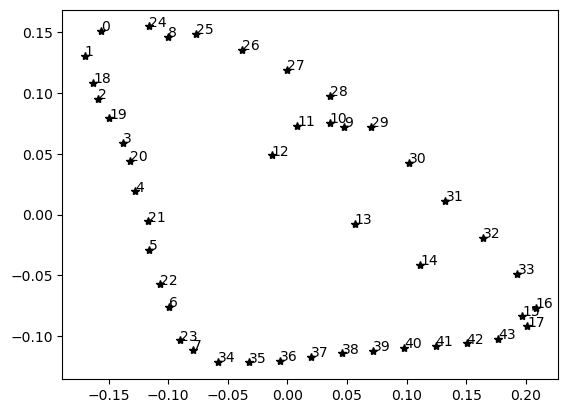

In [ ]:
ex_wing = np.array(male_data.iloc[0,8::])
# reorder landmarks for plotting 
plt.plot(ex_wing[::2], ex_wing[1::2], '*', color='black')
n = list(range(len(ex_wing[::2])))
for i, txt in enumerate(n):
    plt.annotate(txt, (ex_wing[::2][i], ex_wing[1::2][i]))

In [11]:
# reorder landmarks for plotting 
#landmark_order = [28, 27, 26, 25, 8, 24, 0, 1, 18, 2, 19, 3, 20, 4, 21, 5, 22, 6, 23, 7, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 17, 15, 16, 33, 32, 31, 30, 29, 9, 10, 11, 12, 13, 14]

# select reordered landmarks, no inner veins 
landmark_order = [28, 27, 26, 25, 8, 24, 0, 1, 18, 2, 19, 3, 20, 4, 21, 5, 22, 6, 23, 7, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 17, 15, 16, 33, 32, 31, 30, 29]

In [12]:
 # select only male butterflies
leaves_data=[]
for leaf in leaves_string:
    indices = np.where(male_data.species==leaf)
    cur_specimen = male_data.iloc[indices[0],:]
    cur_leaf = np.mean(np.array(cur_specimen.iloc[:,8::]), axis=0) 
    leaves_data.append(np.array(list(zip(cur_leaf[::2][landmark_order], cur_leaf[1::2][landmark_order]))).flatten())

In [13]:
dataframe = pd.DataFrame(np.array(leaves_data).T, columns=leaves_string)
pd.DataFrame.to_csv(dataframe, f'data/forewing_data_male_n={len(landmark_order)}_no_veins.csv', index=False)


## Visualize all landmarks data

In [14]:
forewing = np.array(pd.read_csv(f'data/forewing_data_male_n={len(landmark_order)}_no_veins.csv', delimiter=','))

0
[ 0.04172401  0.10696777  0.00477519  0.12899827 -0.03485583  0.14388586
 -0.07548311  0.15252951 -0.08846512  0.14329068 -0.11528852  0.15305775
 -0.15245419  0.14323971 -0.16763669  0.12162351 -0.16633152  0.10566195
 -0.16056161  0.09142154 -0.15327426  0.07530288 -0.14400656  0.05781631
 -0.13534023  0.04229455 -0.12676253  0.01715744 -0.11830242 -0.00657354
 -0.11547684 -0.03393131 -0.11083461 -0.05920043 -0.10654484 -0.08600077
 -0.0976206  -0.10754621 -0.0836394  -0.12021516 -0.05834134 -0.12382076
 -0.03208432 -0.12092744 -0.00618812 -0.11708077  0.01961005 -0.11339134
  0.04534387 -0.10993192  0.0712467  -0.10708654  0.09725869 -0.10537481
  0.1232238  -0.10482232  0.1489851  -0.1046215   0.17561146 -0.10280994
  0.19616491 -0.09603523  0.19402874 -0.08641505  0.20392066 -0.07965265
  0.18669679 -0.05108044  0.16158864 -0.01881162  0.13385437  0.01434252
  0.10515771  0.04713515  0.07505313  0.07869007]
1
[ 0.03861936  0.10217432  0.00301642  0.12504034 -0.03523117  0.142521

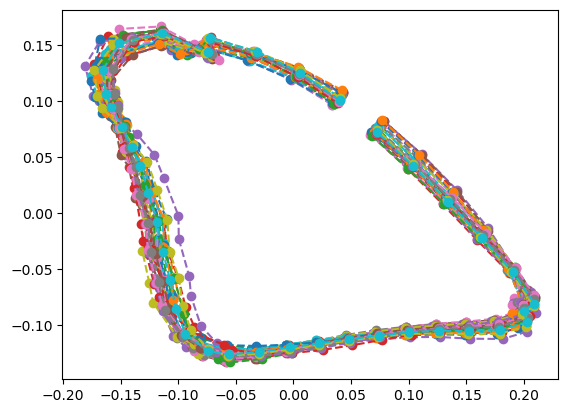

In [15]:
for i in range(forewing.shape[1]):
    print(i)
    wing = forewing[:,i]
    print(wing)
    plt.plot(wing[::2], wing[1::2], '--o')

# Create full hindwing male data

In [11]:
wing = 'hindwing'
file = f'data/Morpho_{wing}_procCoor.txt' # read in all landmark data from chazot
hindwing_data =  pd.read_csv(file, sep="\t", index_col=False)
male_hindwing_data = hindwing_data.loc[hindwing_data['sex']=='M']
male_hindwing_data

,ID,Individual,sex,genus,species,size,flight,node,ProcCoord1,ProcCoord2,...,ProcCoord49,ProcCoord50,ProcCoord51,ProcCoord52,ProcCoord53,ProcCoord54,ProcCoord55,ProcCoord56,ProcCoord57,ProcCoord58
0,1,PB13-0001,M,Morpho,hercules,15.98824,can,23,0.169498,0.015683,...,-0.022071,0.134292,-0.056614,0.142439,-0.090599,0.149739,-0.124480,0.154184,-0.157703,0.157510
1,2,PB13-0002,M,Morpho,hercules,14.33649,can,23,0.158459,0.023955,...,-0.021090,0.145219,-0.056648,0.152766,-0.091540,0.155913,-0.125850,0.156719,-0.159278,0.157342
2,3,PB13-0003,M,Morpho,hercules,14.51418,can,23,0.167054,0.021576,...,-0.022693,0.135925,-0.057076,0.145099,-0.091225,0.151721,-0.125536,0.154046,-0.159183,0.158783
5,6,PB13-0006,M,Morpho,hercules,14.34147,can,23,0.160359,0.020897,...,-0.021157,0.136430,-0.055494,0.145348,-0.089612,0.152173,-0.123700,0.156813,-0.157502,0.158511
6,7,PB13-0007,M,Morpho,hercules,15.16600,can,23,0.152480,0.030801,...,-0.022564,0.141630,-0.057397,0.149749,-0.091973,0.154222,-0.126189,0.155846,-0.159256,0.156449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,897,PB13.1182,M,Morpho,helenor,11.32592,under,8,0.137412,0.031590,...,-0.019694,0.145728,-0.055084,0.154373,-0.090045,0.158909,-0.124617,0.162615,-0.159675,0.164819
897,898,PB13.1183,M,Morpho,helenor,11.60712,under,8,0.153304,0.021459,...,-0.020430,0.140369,-0.054913,0.150492,-0.089417,0.157914,-0.124109,0.162970,-0.159596,0.166267
898,899,PB13.1184,M,Morpho,helenor,12.25338,under,8,0.152527,0.023229,...,-0.020749,0.139572,-0.055213,0.149235,-0.089438,0.157582,-0.124208,0.163484,-0.159807,0.165754
899,900,PB13.1185,M,Morpho,helenor,11.04232,under,8,0.147208,0.030880,...,-0.022072,0.141034,-0.056826,0.150071,-0.091129,0.157786,-0.125617,0.165066,-0.161915,0.169065


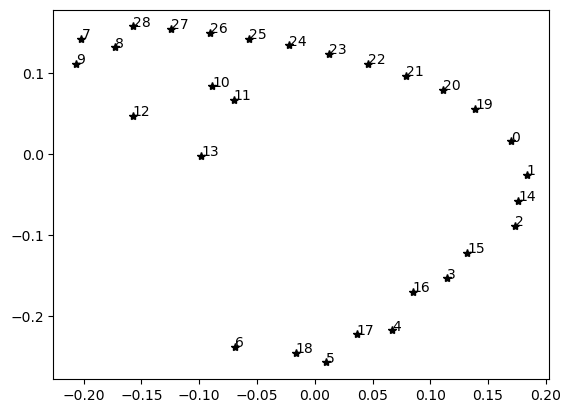

In [12]:
ex_wing = np.array(male_hindwing_data.iloc[0,8::])
# reorder landmarks for plotting 
plt.plot(ex_wing[::2], ex_wing[1::2], '*', color='black')
n = list(range(len(ex_wing[::2])))
for i, txt in enumerate(n):
    plt.annotate(txt, (ex_wing[::2][i], ex_wing[1::2][i]))

In [23]:
landmark_order_hindwing = [8,10,11,13,12,9,7,28,27,26,25,24,23,22,21,20,19,0,1,14,2,15,3,16,4,17,5,18,6] # select the landmarks we want to use for analysis 
# select only male butterflies
leaves_data_hindwing = []
for leaf in leaves_string:
    indices = np.where(male_hindwing_data.species==leaf)
    cur_specimen = male_hindwing_data.iloc[indices[0],:]
    cur_leaf = np.mean(np.array(cur_specimen.iloc[:,8::]), axis=0) 
    leaves_data_hindwing.append(np.array(list(zip(cur_leaf[::2][landmark_order_hindwing], cur_leaf[1::2][landmark_order_hindwing]))).flatten())

In [24]:
dataframe = pd.DataFrame(np.array(leaves_data_hindwing).T, columns=leaves_string)
pd.DataFrame.to_csv(dataframe, f'data/hindwing_data_male_n={len(landmark_order_hindwing)}_veins.csv', index=False)


In [25]:
# try loading and plotting the data 
hindwing = np.array(pd.read_csv(f'data/hindwing_data_male_n={len(landmark_order_hindwing)}_veins.csv', delimiter=','))

0
[-0.16903015  0.14371061 -0.08634947  0.08649732 -0.06986694  0.06604051
 -0.08104431 -0.02363163 -0.13656076  0.02810159 -0.20356342  0.12494164
 -0.19000522  0.1617985  -0.15925349  0.16842349 -0.12390045  0.16455786
 -0.08959018  0.15852659 -0.05553961  0.15007026 -0.0216466   0.13905506
  0.01153827  0.12535909  0.04333009  0.10929056  0.07363613  0.09126147
  0.10234077  0.07114907  0.1283844   0.04872918  0.15032602  0.0234034
  0.16692631 -0.03264865  0.16199163 -0.05356496  0.14961972 -0.08808086
  0.13227254 -0.11919598  0.11452328 -0.14800993  0.09463101 -0.17461918
  0.07293441 -0.20116097  0.04016585 -0.22491073  0.01061363 -0.25062449
 -0.01863298 -0.26329009 -0.04825049 -0.28117877]
1
[-0.16600782  0.14403992 -0.08186956  0.08304305 -0.06364237  0.06020967
 -0.07943319 -0.03268597 -0.13609401  0.02159098 -0.20385774  0.12435656
 -0.18762498  0.1625641  -0.15918433  0.16811043 -0.12421056  0.16351992
 -0.09018527  0.15693019 -0.05620723  0.1487874  -0.02217046  0.1385244

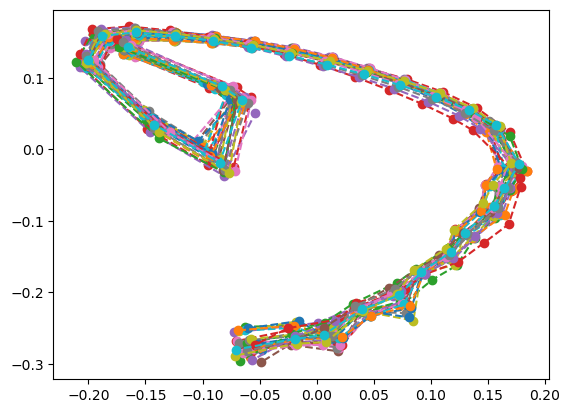

In [26]:
for i in range(hindwing.shape[1]):
    print(i)
    wing = hindwing[:,i]
    print(wing)
    plt.plot(wing[::2], wing[1::2], '--o')

# Create full female forewing data 

In [66]:
female_data = data.loc[data['sex']=='F']

In [67]:
 # select only male butterflies
leaves_data=[]
for leaf in leaves_string:
    indices = np.where(female_data.species==leaf)
    cur_specimen = female_data.iloc[indices[0],:]
    cur_leaf = np.mean(np.array(cur_specimen.iloc[:,8::]), axis=0) 
    leaves_data.append(np.array(list(zip(cur_leaf[::2][landmark_order], cur_leaf[1::2][landmark_order]))).flatten())

/Users/lkn315/opt/miniconda3/envs/man1/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lkn315/opt/miniconda3/envs/man1/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
dataframe = pd.DataFrame(np.array(leaves_data).T, columns=leaves_string)
pd.DataFrame.to_csv(dataframe, 'data/forewing_data_female_n=88.csv', index=False)


In [ ]:
forewing = np.array(pd.read_csv('data/forewing_data_female_n=88.csv', delimiter=','))
for i in range(forewing.shape[1]):
    print(i)
    wing = forewing[:,i]
    print(wing)
    plt.plot(wing[::2], wing[1::2], '--o')